# HCPC with PCA

In [1]:
# Chargement des données
from scientisttools.datasets import load_autos2005
autos = load_autos2005()
autos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40 entries, ALFA 156     to YARIS       
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   puissance     40 non-null     int64  
 1   cylindree     40 non-null     int64  
 2   vitesse       40 non-null     int64  
 3   longueur      40 non-null     int64  
 4   largeur       40 non-null     int64  
 5   hauteur       40 non-null     int64  
 6   poids         40 non-null     int64  
 7   coffre        40 non-null     int64  
 8   reservoir     40 non-null     int64  
 9   consommation  40 non-null     float64
 10  CO2           40 non-null     int64  
 11  prix          40 non-null     int64  
 12  origine       40 non-null     object 
 13  Carburant     40 non-null     object 
 14  type4X4       40 non-null     object 
dtypes: float64(1), int64(11), object(3)
memory usage: 5.0+ KB


In [2]:
autos.head(6)

,puissance,cylindree,vitesse,longueur,largeur,hauteur,poids,coffre,reservoir,consommation,CO2,prix,origine,Carburant,type4X4
ROW_LABEL,,,,,,,,,,,,,,,
ALFA 156,250,3179,250,443,175,141,1410,378,63,12.1,287,40800,Europe,Essence,Type4x4_non
AUDIA3,102,1595,185,421,177,143,1205,350,55,7.0,168,21630,Europe,Essence,Type4x4_non
AUDIA8,280,3697,250,506,203,145,1770,500,90,11.7,281,78340,Europe,Essence,Type4x4_non
AVENSIS,115,1995,195,463,176,148,1400,510,60,5.8,155,26400,Autres,Diesel,Type4x4_non
BMW X5,218,2993,210,467,188,172,2095,465,93,8.6,229,52000,Europe,Diesel,Type4x4_non
BMW530,231,2979,250,485,185,147,1495,520,70,9.5,231,46400,Europe,Essence,Type4x4_non


In [3]:
from scientisttools.decomposition import PCA
acp = PCA(row_labels=autos.index,
          col_labels=autos.columns[:9],
          quanti_sup_labels=["consommation","CO2","prix"],
          quali_sup_labels=["origine","Carburant","type4X4"],
          parallelize=False)

#Instanciation
acp.fit(autos)

PCA(col_labels=Index(['puissance', 'cylindree', 'vitesse', 'longueur', 'largeur', 'hauteur',
       'poids', 'coffre', 'reservoir'],
      dtype='object'),
    quali_sup_labels=['origine', 'Carburant', 'type4X4'],
    quanti_sup_labels=['consommation', 'CO2', 'prix'],
    row_labels=Index(['ALFA 156    ', 'AUDIA3      ', 'AUDIA8     ', 'AVENSIS     ',
       'BMW X5      ', 'BMW530      ', 'CHRYS300    ', 'CITRONC2    ',
       'CITRONC4    ', 'CITRONC5    ', 'CLIO        ', 'CORSA       ',
       'CORVETTE    ', 'FIESTA      ', 'GOLF        ', 'LAGUNA      ',
       'LANDCRUI    ', 'MAZDARX8    ', 'MEGANECC      ', 'MERC_A      ',
       'MERC_E      ', 'MODUS       ', 'MONDEO      ', 'MURANO      ',
       'MUSA        ', 'OUTLAND     ', 'P1007       ', 'P307CC      ',
       'P407        ', 'P607        ', 'PANDA       ', 'PASSAT      ',
       'PTCRUISER   ', 'SANTA_FE    ', 'TAHOE       ', 'TWINGO      ',
       'VECTRA      ', 'VELSATIS    ', 'X-TRAIL     ', 'YARIS       '],
      dtype='object', name='ROW_LABEL'))

In [4]:
from scientisttools.clustering import HCPC
hcpc =HCPC(n_clusters=4,
           min_clusters=2,
           max_clusters=8,
           parallelize=False)
hcpc.fit(acp)

HCPC(n_clusters=4)

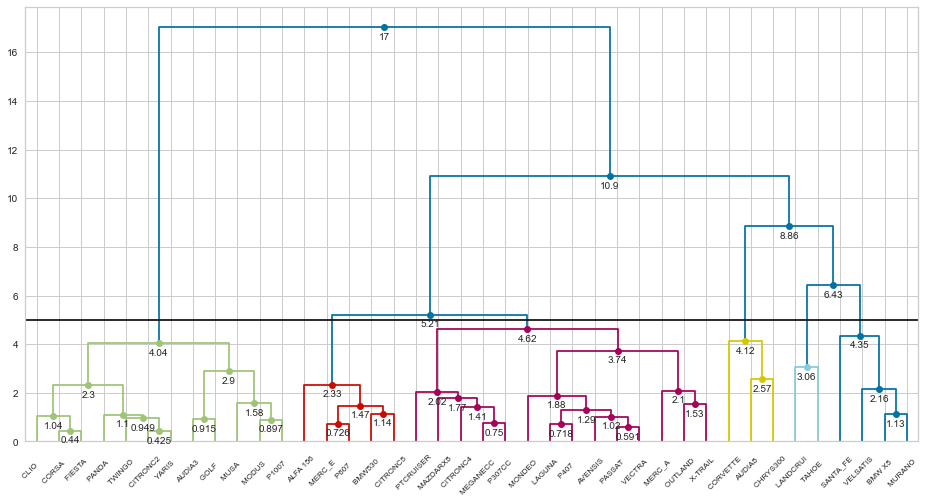

In [5]:
from scientisttools.pyplot import plot_dendrogram
# Plot dendodgram
import matplotlib.pyplot as plt
fig,axe = plt.subplots(figsize=(16,8))
plot_dendrogram(hcpc,ax=axe,max_d=5)
plt.show()

C:\Users\duver\AppData\Roaming\Python\Python310\site-packages\plotnine\layer.py:411: PlotnineWarning: geom_point : Removed 40 rows containing missing values.
C:\Users\duver\AppData\Roaming\Python\Python310\site-packages\plotnine\guides\guides.py:253: PlotnineWarning: geom_point legend : Removed 4 rows containing missing values.


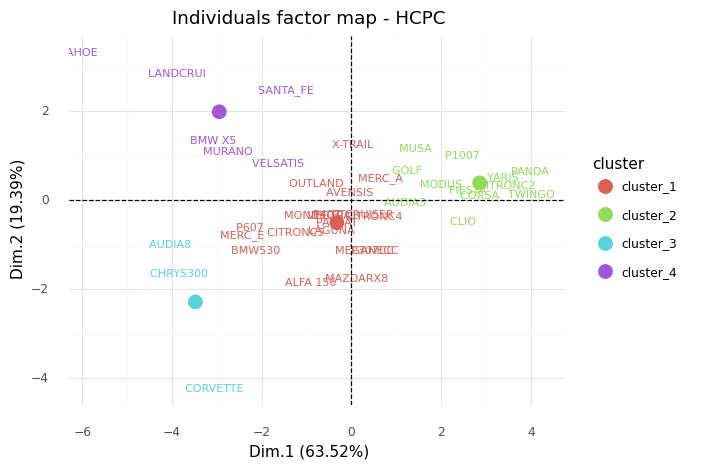

In [6]:

from scientisttools.ggplot import fviz_hcpc_cluster
p = fviz_hcpc_cluster(hcpc,
                      add_ellipse=False,
                      show_clust_cent=True,
                      repel=False)
print(p)

In [7]:
Xmean=hcpc.gmean_
Xmean

,cluster_1,cluster_2,cluster_3,cluster_4
puissance,177.631579,78.583333,341.333333,203.500000
cylindree,2219.894737,1409.833333,5107.000000,3360.166667
vitesse,219.684211,167.333333,266.666667,187.000000
longueur,453.894737,381.833333,484.000000,479.166667
largeur,179.052632,167.750000,192.000000,194.000000
hauteur,148.000000,150.416667,139.333333,175.833333
poids,1472.578947,1059.416667,1707.333333,2069.166667
coffre,398.473684,247.916667,412.333333,509.833333
reservoir,63.052632,46.416667,77.000000,85.666667


In [8]:
hcpc.cluster_infos_

,n(k),p(k)
cluster,,
cluster_1,19,0.475
cluster_2,12,0.300
cluster_3,3,0.075
cluster_4,6,0.150


In [9]:
hcpc.cluster_centers_

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9
cluster,,,,,,,,,
cluster_1,-0.324943,-0.509283,-0.367081,0.106596,0.175029,-0.115149,-0.056886,0.007431,0.019452
cluster_2,2.858108,0.386629,0.308110,-0.051443,-0.182293,0.084212,0.023968,-0.041014,-0.008050
cluster_3,-3.479437,-2.289931,0.828519,-0.465817,-0.504298,0.126703,0.001522,-0.037243,-0.037606
cluster_4,-2.947513,1.984439,0.131944,-0.001758,0.062475,0.132865,0.131442,0.077119,-0.026695


In [10]:
hcpc.desc_var_quanti_

vtest        pvalue  mean in category  overall mean  \
cluster_1 vitesse    3.003186  2.671691e-03        219.684211       202.600   
          longueur   2.047737  4.058575e-02        453.894737       438.325   
          coffre     1.204483  2.284030e-01        398.473684       371.050   
          puissance  1.011069  3.119832e-01        177.631579       164.075   
          poids      0.269433  7.875965e-01       1472.578947      1455.725   
          reservoir  0.213733  8.307554e-01         63.052632        62.500   
          largeur    0.091200  9.273336e-01        179.052632       178.875   
          cylindree -0.723719  4.692384e-01       2219.894737      2364.450   
          hauteur   -1.837392  6.615208e-02        148.000000       152.250   
cluster_2 hauteur   -0.545505  5.854062e-01        150.416667       152.250   
          cylindree -3.289345  1.004209e-03       1409.833333      2364.450   
          coffre    -3.722159  1.975266e-04        247.916667       371.050   
          largeur   -3.931149  8.454076e-05        167.750000       178.875   
          vitesse   -4.266740  1.983500e-05        167.333333       202.600   
          reservoir -4.281106  1.859666e-05         46.416667        62.500   
          poids     -4.360404  1.298224e-05       1059.416667      1455.725   
          puissance -4.388329  1.142251e-05         78.583333       164.075   
          longueur  -5.113542  3.161740e-07        381.833333       438.325   
cluster_3 cylindree  4.110391  3.949903e-05       5107.000000      2364.450   
          puissance  3.957584  7.571158e-05        341.333333       164.075   
          vitesse    3.371414  7.478343e-04        266.666667       202.600   
          largeur    2.017284  4.366591e-02        192.000000       178.875   
          longueur   1.798308  7.212818e-02        484.000000       438.325   
          reservoir  1.678789  9.319318e-02         77.000000        62.500   
          poids      1.204112  2.285465e-01       1707.333333      1455.725   
          coffre     0.542803  5.872655e-01        412.333333       371.050   
          hauteur   -1.671691  9.458535e-02        139.333333       152.250   
cluster_4 hauteur    4.502845  6.704964e-06        175.833333       152.250   
          poids      4.331032  1.484122e-05       2069.166667      1455.725   
          reservoir  3.957018  7.589115e-05         85.666667        62.500   
          largeur    3.429568  6.045422e-04        194.000000       178.875   
          coffre     2.692038  7.101690e-03        509.833333       371.050   
          longueur   2.372277  1.767882e-02        479.166667       438.325   
          cylindree  2.201612  2.769275e-02       3360.166667      2364.450   
          puissance  1.298589  1.940851e-01        203.500000       164.075   
          vitesse   -1.211103  2.258561e-01        187.000000       202.600   

                     sd in categorie   overall sd significant  
cluster_1 vitesse          17.859253    33.791863          **  
          longueur         24.998726    45.165467          **  
          coffre          107.627216   135.246063              
          puissance        39.280651    79.646842              
          poids           120.009349   371.578322              
          reservoir         7.416012    15.359036              
          largeur           4.828356    11.569761              
          cylindree       483.511051  1186.488473              
          hauteur           8.404260    13.739996           *  
cluster_2 hauteur           8.271017    13.739996              
          cylindree       299.062935  1186.488473          **  
          coffre           60.788511   135.246063         ***  
          largeur           4.934994    11.569761         ***  
          vitesse          13.021350    33.791863         ***  
          reservoir         5.678297    15.359036         ***  
          poids           149.702181   371.578322         ***  
          pu

In [11]:
hcpc.desc_axes_infos_

vtest    pvalue  mean in category  overall mean  \
cluster_1 Dim.5  2.303215  0.021267          0.175029  1.734723e-16   
          Dim.4  1.229736  0.218796          0.106596  1.040834e-17   
          Dim.9  0.676620  0.498647          0.019452  5.412337e-17   
          Dim.8  0.222297  0.824083          0.007431  4.961309e-17   
          Dim.1 -0.807277  0.419507         -0.324943 -2.331468e-16   
          Dim.7 -1.183606  0.236569         -0.056886 -2.338407e-16   
          Dim.6 -2.014472  0.043960         -0.115149 -7.147061e-17   
          Dim.2 -2.290345  0.022001         -0.509283 -2.692291e-16   
          Dim.3 -2.431771  0.015025         -0.367081  1.276756e-16   
cluster_2 Dim.1  4.886962  0.000001          2.858108 -2.331468e-16   
          Dim.3  1.404790  0.160084          0.308110  1.276756e-16   
          Dim.2  1.196685  0.231429          0.386629 -2.692291e-16   
          Dim.6  1.013948  0.310608          0.084212 -7.147061e-17   
          Dim.7  0.343222  0.731432          0.023968 -2.338407e-16   
          Dim.9 -0.192722  0.847177         -0.008050  5.412337e-17   
          Dim.4 -0.408454  0.682941         -0.051443  1.040834e-17   
          Dim.8 -0.844475  0.398404         -0.041014  4.961309e-17   
          Dim.5 -1.650966  0.098746         -0.182293  1.734723e-16   
cluster_3 Dim.3  1.643067  0.100369          0.828519  1.276756e-16   
          Dim.6  0.663558  0.506973          0.126703 -7.147061e-17   
          Dim.7  0.009483  0.992434          0.001522 -2.338407e-16   
          Dim.8 -0.333545  0.738723         -0.037243  4.961309e-17   
          Dim.9 -0.391588  0.695363         -0.037606  5.412337e-17   
          Dim.4 -1.608719  0.107678         -0.465817  1.040834e-17   
          Dim.5 -1.986568  0.046970         -0.504298  1.734723e-16   
          Dim.1 -2.587721  0.009661         -3.479437 -2.331468e-16   
          Dim.2 -3.082879  0.002050         -2.289931 -2.692291e-16   
cluster_4 Dim.2  3.941379  0.000081          1.984439 -2.692291e-16   
          Dim.7  1.207828  0.227113          0.131442 -2.338407e-16   
          Dim.6  1.026550  0.304632          0.132865 -7.147061e-17   
          Dim.8  1.018930  0.308236          0.077119  4.961309e-17   
          Dim.3  0.386027  0.699476          0.131944  1.276756e-16   
          Dim.5  0.363079  0.716546          0.062475  1.734723e-16   
          Dim.4 -0.008959  0.992852         -0.001758  1.040834e-17   
          Dim.9 -0.410085  0.681744         -0.026695  5.412337e-17   
          Dim.1 -3.234004  0.001221         -2.947513 -2.331468e-16   

                 sd in categorie  overall sd significant  
cluster_1 Dim.5         0.386412    0.451415          **  
          Dim.4         0.450036    0.514905              
          Dim.9         0.197290    0.170775              
          Dim.8         0.214565    0.198558              
          Dim.1         0.900577    2.391022              
          Dim.7         0.271092    0.285494              
          Dim.6         0.338914    0.339547          **  
          Dim.2         0.734490    1.320864          **  
          Dim.3         0.733702    0.896683          **  
cluster_2 Dim.1         0.936071    2.391022         ***  
          Dim.3         0.419338    0.896683              
          Dim.2         0.437152    1.320864              
          Dim.6         0.250078    0.339547              
          Dim.7         0.188909    0.285494              
          Dim.9         0.124177    0.170775              
          Dim.4         0.280455    0.514905              
          Dim.8         0.162906    0.198558              
          Dim.5         0.329250    0.451415           *  
cluster_3 Dim.3         0.918952    0.896683              
          Dim.6         0.254409    0.339547              
          Dim.7         0.518856    0.285494              
          Dim.8         0.057479    0.198558              
          Dim.9         0.116805   

In [12]:
hcpc.gmean_

,cluster_1,cluster_2,cluster_3,cluster_4
puissance,177.631579,78.583333,341.333333,203.500000
cylindree,2219.894737,1409.833333,5107.000000,3360.166667
vitesse,219.684211,167.333333,266.666667,187.000000
longueur,453.894737,381.833333,484.000000,479.166667
largeur,179.052632,167.750000,192.000000,194.000000
hauteur,148.000000,150.416667,139.333333,175.833333
poids,1472.578947,1059.416667,1707.333333,2069.166667
coffre,398.473684,247.916667,412.333333,509.833333
reservoir,63.052632,46.416667,77.000000,85.666667


In [13]:
hcpc.correlation_ratio_

,Sum. Intra,Sum. Inter,correlation ratio,F-stats,pvalue
poids,1.184913e+06,4.337905e+06,0.7855,43.9314,0.0000
puissance,5.895950e+04,1.947853e+05,0.7676,39.6446,0.0000
vitesse,1.143144e+04,3.424416e+04,0.7497,35.9474,0.0000
reservoir,2.475197e+03,6.960803e+03,0.7377,33.7467,0.0000
longueur,2.242829e+04,5.916849e+04,0.7251,31.6574,0.0000
cylindree,1.646420e+07,3.984600e+07,0.7076,29.0419,0.0000
largeur,1.979197e+03,3.375178e+03,0.6304,20.4639,0.0000
hauteur,3.330417e+03,4.221083e+03,0.5590,15.2092,0.0000
coffre,4.147512e+05,3.169087e+05,0.4331,9.1691,0.0001


In [14]:
hcpc.cluster_

,cluster
ROW_LABEL,
ALFA 156,cluster_1
AUDIA3,cluster_2
AUDIA8,cluster_3
AVENSIS,cluster_1
BMW X5,cluster_4
BMW530,cluster_1
CHRYS300,cluster_3
CITRONC2,cluster_2
CITRONC4,cluster_1
